# Chapter 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data prep
listings = pd.read_excel('./data/listings.xlsx', sheetname='nyse', na_values='n/a')
listings.dropna(subset=['Sector'], inplace=True)
listings['Market Capitalization'] /= 1e6

#listings['Stock Symbol'] = listings['Company Name']

/Users/Brian/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [2]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings = listings[listings.Sector != ""]

# Select companies with ipo year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             2177 non-null object
Company Name             2177 non-null object
Last Sale                2175 non-null float64
Market Capitalization    2177 non-null float64
IPO Year                 967 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 136.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, WBAI to ZTO
Data columns (total 6 columns):
Company Name             967 non-null object
Last Sale                967 non-null float64
Market Capitalization    967 non-null float64
IPO Year                 967 non-null float64
Sector                   967 non-null object
Industry                 967 non-null object
dtypes: float64(3), object(3)
memory usage: 52.9+ KB
None
Sector
Consumer Services        240
Finance                  132
Energy       

In [3]:
# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols =  ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

Sector                 Stock Symbol
Miscellaneous          BABA            275525.000000
Technology             ORCL            181046.096000
Health Care            ABBV            102196.076208
Transportation         UPS              90180.886756
Finance                GS               88840.590477
Consumer Non-Durables  ABEV             88240.198455
Basic Industries       RIO              70431.476895
Public Utilities       TEF              54609.806092
Capital Goods          GM               50086.335099
Consumer Services      LVS              44384.295569
Energy                 PAA              22223.001416
Consumer Durables      WRK              12354.903312
Name: Market Capitalization, dtype: float64
Index(['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')
                                    Company Name  Market Capitalization  \
Stock Symbol                                                     

Index(['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None


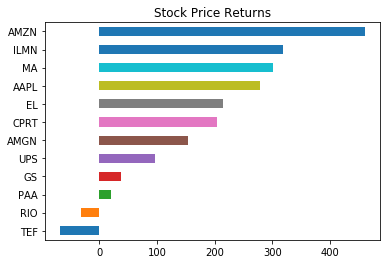

In [53]:
# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('./data/stock_data.csv', index_col='Date', parse_dates=['Date'])
print(stock_prices.info())

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.show()

In [19]:
price_return

AAPL    278.868171
AMGN    153.309078
AMZN    460.022405
CPRT    204.395604
EL      215.162752
GS       38.346429
ILMN    319.116203
MA      302.063863
PAA      19.592593
RIO     -31.358201
TEF     -67.775832
UPS      97.043658
dtype: float64

In [40]:
# data prep
listings.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
WBAI,500.com Limited,13.96,579.312876,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,5225.238185,2013.0,Technology,"Computer Software: Programming, Data Processing"
ATEN,"A10 Networks, Inc.",8.72,595.982195,2014.0,Technology,Computer Communications Equipment
AAC,"AAC Holdings, Inc.",8.08,191.418723,2014.0,Health Care,Medical Specialities
ABBV,AbbVie Inc.,64.13,102196.076208,2012.0,Health Care,Major Pharmaceuticals


In [45]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers, ['Company Name', 'Market Capitalization', 'Last Sale']]

# Print the first rows of components
print(components.head())

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])
components['Number of Shares'] = no_shares

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, WBAI to ZTO
Data columns (total 6 columns):
Company Name             967 non-null object
Last Sale                967 non-null float64
Market Capitalization    967 non-null float64
IPO Year                 967 non-null float64
Sector                   967 non-null object
Industry                 967 non-null object
dtypes: float64(3), object(3)
memory usage: 92.9+ KB
None
Index(['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')
                        Company Name  Market Capitalization  Last Sale
Stock Symbol                                                          
RIO                    Rio Tinto Plc           70431.476895      38.94
GM            General Motors Company           50086.335099      33.39
WRK                 Westrock Company           12354.903312      49.34
ABEV                      Ambev S.A.           88240.198455       5.

Stock Symbol
WRK       250.403391
GS        397.817439
PAA       723.404994
LVS       793.994554
UPS       869.297154
GM       1500.039985
ABBV     1593.576738
RIO      1808.717948
BABA     2500.000000
ORCL     4114.684000
TEF      5037.804990
ABEV    15701.102928
Name: Number of Shares, dtype: float64


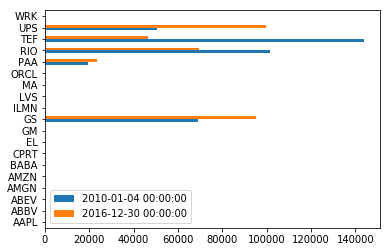

In [75]:
# Select the number of shares
no_shares = components['Number of Shares']
print(no_shares.sort_values())

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

In [74]:
market_cap

,AAPL,ABBV,ABEV,AMGN,AMZN,BABA,CPRT,EL,GM,GS,ILMN,LVS,MA,ORCL,PAA,RIO,TEF,UPS,WRK
Date,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68854.242342,NaN,NaN,NaN,NaN,19531.934838,101342.466626,143829.332464,50575.708420,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70071.563705,NaN,NaN,NaN,NaN,19748.956336,102916.051241,143728.576365,50662.638135,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69323.666920,NaN,NaN,NaN,NaN,19741.722286,106063.220471,142217.234868,50288.840359,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70680.224387,NaN,NaN,NaN,NaN,19502.998638,106081.307650,139799.088472,49906.349611,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69343.557792,NaN,NaN,NaN,NaN,19568.105088,107256.974316,138892.283574,52305.609756,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68249.559835,NaN,NaN,NaN,NaN,19531.934838,106316.440983,135869.600580,54609.247214,NaN
2010-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66761.722613,NaN,NaN,NaN,NaN,19206.402591,103169.271754,134862.039582,54244.142410,NaN
2010-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67258.994412,NaN,NaN,NaN,NaN,19314.913340,105773.825599,136272.624979,53957.274349,NaN
2010-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67044.172995,NaN,NaN,NaN,NaN,19358.317639,107546.369188,135768.844480,54070.282979,NaN


### Diversion - explore .mul()
There is some clever stuff going on here - and this chapters exercises were much harder to munge, because data was a 1D dataframe instead of a series, and vice versa.

mul, div, add and subtract needs some exercises to understand how they interact. For instance, the market_cap above - has NaN's where I multiplied by a Series that did not have a row that match those columns.

In [123]:
left = pd.DataFrame({'aapl': [50,60,70,80,90],
                     'eght': [10,10,10,10,10],
                     'ring': [20,25,30,35,40]})
print(left)

right = pd.DataFrame({'aapl': [0.5],
                      'eght': [2]})
print(right)

# Let's see the result with a dataframe on the right
print(left.mul(right))

# So we've multiplied 2 x 2D tables

   aapl  eght  ring
0    50    10    20
1    60    10    25
2    70    10    30
3    80    10    35
4    90    10    40
   aapl  eght
0   0.5     2
   aapl  eght  ring
0  25.0  20.0   NaN
1   NaN   NaN   NaN
2   NaN   NaN   NaN
3   NaN   NaN   NaN
4   NaN   NaN   NaN


In [124]:
# Let's try with a series
print(right.squeeze().shape)
print(right.squeeze())

# This produces a 1D series with the column names as index
(right.squeeze().index)

# So we have different behaviour on multiplication
# There is no column for a series, only an index
print(left.mul(right.squeeze()))

(2,)
aapl    0.5
eght    2.0
Name: 0, dtype: float64
   aapl  eght  ring
0  25.0  20.0   NaN
1  30.0  20.0   NaN
2  35.0  20.0   NaN
3  40.0  20.0   NaN
4  45.0  20.0   NaN


Date
2010-01-04    6.948176e+05
2010-01-05    6.979957e+05
2010-01-06    6.946857e+05
2010-01-07    6.912416e+05
2010-01-08    6.958476e+05
2010-01-11    6.900534e+05
2010-01-12    6.804604e+05
2010-01-13    6.891775e+05
2010-01-14    6.886516e+05
2010-01-15    6.803840e+05
2010-01-19    6.950413e+05
2010-01-20    6.808697e+05
2010-01-21    6.639949e+05
2010-01-22    6.444539e+05
2010-01-25    6.500961e+05
2010-01-26    6.484830e+05
2010-01-27    6.531749e+05
2010-01-28    6.403780e+05
2010-01-29    6.280382e+05
2010-02-01    6.370596e+05
2010-02-02    6.433044e+05
2010-02-03    6.418327e+05
2010-02-04    6.147855e+05
2010-02-05    6.182118e+05
2010-02-08    6.132701e+05
2010-02-09    6.251142e+05
2010-02-10    6.233165e+05
2010-02-11    6.297971e+05
2010-02-12    6.276746e+05
2010-02-16    6.390117e+05
                  ...     
2016-11-17    1.532619e+06
2016-11-18    1.531333e+06
2016-11-21    1.555436e+06
2016-11-22    1.559177e+06
2016-11-23    1.554286e+06
2016-11-25    1.558921e

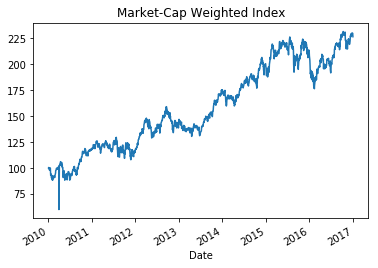

In [132]:
# data prep
components = pd.read_csv('./data/components.csv', index_col=0)
market_cap_series = pd.read_csv('./data/market_cap_series.csv',
                               index_col='Date',
                               parse_dates=['Date'])

# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

index.to_csv('./data/index.csv')

# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

## Evaluate Index Performance

126.65826661173813
1800858.8762796503
Stock Symbol
CPRT    0.007564
PAA     0.012340
ILMN    0.014110
EL      0.017282
TEF     0.030324
RIO     0.039110
GS      0.049332
UPS     0.050077
AMGN    0.066039
MA      0.068484
AMZN    0.234410
AAPL    0.410929
Name: Market Capitalization, dtype: float64


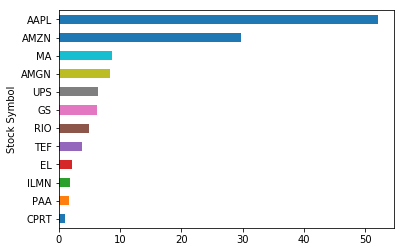

In [144]:
# Calculate and print the index return here
index_return = ((index.iloc[-1] / index.iloc[0]) - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()
print(total_market_cap)

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

                 Index
Date                  
2010-01-04  100.000000
2010-01-05  100.457394
2010-01-06   99.981005
2010-01-07   99.485328
2010-01-08  100.148231
                  djia
date                  
2010-01-04  100.000000
2010-01-05   99.887188
2010-01-06   99.902872
2010-01-07  100.216365
2010-01-08  100.323414
                 Index        DJIA
Date                              
2010-01-04  100.000000  100.000000
2010-01-05  100.457394   99.887188
2010-01-06   99.981005   99.902872
2010-01-07   99.485328  100.216365
2010-01-08  100.148231  100.323414
Index    126.658267
DJIA      86.722172
dtype: float64


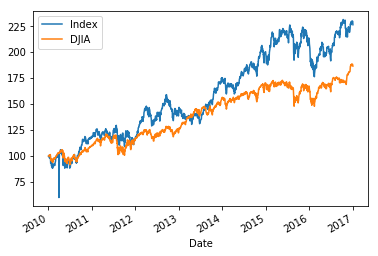

In [168]:
# data prep
djia = pd.read_csv('./data/djia.csv', index_col='date', parse_dates=['date'])
djia = djia[djia.index >= '2010-01-04']

# Convert index series to dataframe here
data = index.to_frame(name='Index')

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
print(data.head())
print(djia.head())
data['DJIA'] = djia
print(data.head())

# Show total return for both index and djia
print(((data.iloc[-1]/data.iloc[0])-1)*100)

# Plot both series
data.plot()
plt.show()

In [158]:
djia.iloc[0]

djia    100.0
Name: 2007-06-29 00:00:00, dtype: float64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
Index    1762 non-null float64
DJIA     1762 non-null float64
dtypes: float64(2)
memory usage: 121.3 KB
None
                 Index        DJIA
Date                              
2010-01-04  100.000000  100.000000
2010-01-05  100.457394   99.887188
2010-01-06   99.981005   99.902872
2010-01-07   99.485328  100.216365
2010-01-08  100.148231  100.323414


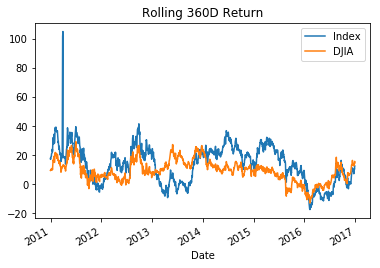

In [175]:
# Inspect data
print(data.info())
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1 ) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

## Index Correlation

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286897  0.327609  0.346615  0.306823  0.344979  0.264790   
AMGN  0.286897  1.000000  0.323407  0.355891  0.349947  0.390075  0.336926   
AMZN  0.327609  0.323407  1.000000  0.298928  0.334090  0.333399  0.242725   
CPRT  0.346615  0.355891  0.298928  1.000000  0.371824  0.423158  0.265664   
EL    0.306823  0.349947  0.334090  0.371824  1.000000  0.358318  0.214066   

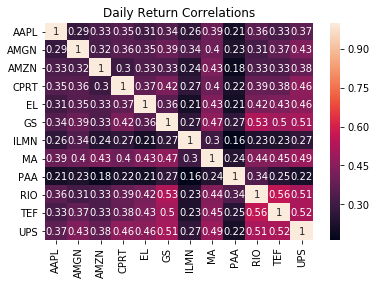

In [185]:
# data prep
import seaborn as sns

# Inspect stock_prices here
print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()

In [177]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB


In [201]:
# data prep
index = pd.read_csv('./data/index.csv', index_col=0, parse_dates=[0], names=['date', 'Index'])

# Inspect index and stock_prices
print(index.info())
print(stock_prices.info())

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel
with pd.ExcelWriter('./data/data.xls') as writer:
    data.to_excel(excel_writer=writer, sheet_name='data')
    returns.to_excel(excel_writer=writer, sheet_name='returns')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
Index    1762 non-null float64
dtypes: float64(1)
memory usage: 27.5 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 259.0 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
AAPL     1761 non-null float64
AMGN     1761 non-null float64
AMZN     1761 non-null float64
CPRT     1761 non-null float64
EL       1762 non